# Final Project

- Name : Jungsoo Lee
- PID: A140525222

## Import Packages

In [1]:
import time
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings("ignore")

from tqdm import notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Load datasets

In [2]:
datasets = {}

### Adult

In [3]:
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'above-50k']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=headers, index_col=False, na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Preprocessing

In [4]:
df.dropna(inplace=True) # Missing value 가 있기 때문에 dropna를 통해 버린다.

In [5]:
X = pd.get_dummies(df.iloc[:, :-1]).values
y = df.iloc[:, -1].map(lambda x: x != ' <=50K').astype(int).values

In [6]:
X.shape, y.shape

((30162, 104), (30162,))

In [7]:
Counter(y)

Counter({0: 22654, 1: 7508})

In [8]:
datasets['adult'] = (X, y)

### Occupancy Detection

In [9]:
df = pd.read_csv('occupancy_detection.csv')
df.head()

,index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8143 non-null   int64  
 1   date           8143 non-null   object 
 2   Temperature    8143 non-null   float64
 3   Humidity       8143 non-null   float64
 4   Light          8143 non-null   float64
 5   CO2            8143 non-null   float64
 6   HumidityRatio  8143 non-null   float64
 7   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 509.1+ KB


#### Preprocessing

In [11]:
df.drop('date', axis=1, inplace=True) # Drop Unuse columns

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
X.shape, y.shape

((8143, 6), (8143,))

In [14]:
Counter(y)

Counter({1: 1729, 0: 6414})

In [15]:
datasets['occupancy'] = (X, y)

### default_of_credit_card_clients

In [16]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Preprocessing

In [18]:
df.drop('ID', axis=1, inplace=True) # Drop Unuse columns

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
X.shape, y.shape

((30000, 23), (30000,))

In [21]:
Counter(y)

Counter({1: 6636, 0: 23364})

In [22]:
datasets['card'] = (X, y)

### MAGIC Gamma Telescope

In [23]:
names = ['fLength', 'fWidth', 'fSize','fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


#### Preprocessing

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].map(lambda x:0 if x=='h' else 1).values

In [26]:
X.shape, y.shape

((19020, 10), (19020,))

In [27]:
Counter(y)

Counter({1: 12332, 0: 6688})

In [28]:
datasets['magic'] = (X, y)

## Modeling

In [29]:
from sklearn.naive_bayes import GaussianNB

models = [LogisticRegression(), RandomForestClassifier(), GaussianNB()]
param_grids = [{'C':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4]},
               {'max_depth':[5, 6, 7, None]},
               {'var_smoothing': np.logspace(0, -9, num=5)}]

mms = MinMaxScaler()

In [30]:
for dn, (X, y) in datasets.items():
    print(dn, X.shape)

adult (30162, 104)
occupancy (8143, 6)
card (30000, 23)
magic (19020, 10)


In [31]:
results = defaultdict(list)
num_train_samples = [1000, 3000, 5000, 7000, 10000]

for dataset, (X, y) in notebook.tqdm(datasets.items(), total=len(datasets), desc='Datasets'):
    for model, param_grid in notebook.tqdm(zip(models, param_grids), total=len(models), desc='Model'):
        for size in notebook.tqdm(num_train_samples, desc='Train size', leave=False):
            # If dataset sample size < num_train_samples : skip
            if X.shape[0]<size:
                continue
            for trial in notebook.tqdm(range(5), desc='Trial', leave=False):
                indices = np.random.choice(range(len(X)), size=size, replace=False)
                X_train = X[indices]
                y_train = y[indices]

                others = np.array(list(set(range(len(X))) - set(indices)))
                X_test = X[others]
                y_test = y[others]

                X_train_scaled = mms.fit_transform(X_train)
                X_test_scaled = mms.transform(X_test)

                gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
                gs.fit(X_train_scaled, y_train)

                best_model = gs.best_estimator_
                best_model.fit(X_train_scaled, y_train)
                y_pred = best_model.predict(X_test_scaled)
                y_prob = best_model.predict_proba(X_test_scaled)
                
                y_pred_train = best_model.predict(X_train_scaled)
                y_prob_train = best_model.predict_proba(X_train_scaled)
                
                results['dataset'].append(dataset)
                results['model'].append(str(model).strip('()'))
                results['train_samples'].append(size)
                results['mean_fit_time'].append(gs.cv_results_['mean_fit_time'].mean())
                results['std_fit_time'].append(gs.cv_results_['std_fit_time'].mean())
                results['trial'].append(trial+1)
                results['best_params'].append(str(gs.best_params_))
                
                # Test set Scores
                results['accuracy'].append(accuracy_score(y_test, y_pred))
                results['f1_score'].append(f1_score(y_test, y_pred, labels=[0, 1]))
                results['precision'].append(precision_score(y_test, y_pred, labels=[0, 1]))
                results['recall'].append(recall_score(y_test, y_pred, labels=[0, 1]))
                results['AUC'].append(roc_auc_score(y_test, y_prob[:, 1], labels=[0, 1]))
                
                # Train set Scores
                results['train_accuracy'].append(accuracy_score(y_train, y_pred_train))
                results['train_f1_score'].append(f1_score(y_train, y_pred_train, labels=[0, 1]))
                results['train_precision'].append(precision_score(y_train, y_pred_train, labels=[0, 1]))
                results['train_recall'].append(recall_score(y_train, y_pred_train, labels=[0, 1]))
                results['train_AUC'].append(roc_auc_score(y_train, y_prob_train[:, 1], labels=[0, 1]))

Datasets:   0%|          | 0/4 [00:00<?, ?it/s]

Model:   0%|          | 0/3 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Model:   0%|          | 0/3 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Model:   0%|          | 0/3 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Model:   0%|          | 0/3 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Train size:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

Trial:   0%|          | 0/5 [00:00<?, ?it/s]

In [32]:
res = pd.DataFrame(results)

## Analyze Result

In [33]:
metrics = ['accuracy', 'f1_score', 'precision', 'recall', 'AUC']

### Table2

In [43]:
melted = pd.melt(res_5000, id_vars=['model', 'dataset'], value_vars=metrics, var_name='metric')

In [44]:
table3 = melted.groupby(['model', 'dataset'], as_index=False)['value'].mean()

In [45]:
table3.sort_values('dataset')

,model,dataset,value
0,GaussianNB,adult,0.698209
4,LogisticRegression,adult,0.317567
8,RandomForestClassifier,adult,0.742796
1,GaussianNB,card,0.583317
5,LogisticRegression,card,0.292323
9,RandomForestClassifier,card,0.606130
2,GaussianNB,magic,0.793047
6,LogisticRegression,magic,0.779213
10,RandomForestClassifier,magic,0.901401
3,GaussianNB,occupancy,0.964828


In [46]:
for dataset in melted['dataset'].unique():
    print('[Dataset : %s]'%dataset)
    for model_a, model_b in combinations(melted['model'].unique(), 2):
        print('%s - %s'%(model_a, model_b))
        melted_filtered = melted[melted['dataset']==dataset].reset_index(drop=True)
        
        t_score, p_value = ttest_ind(melted_filtered[melted_filtered['model']==model_a]['value'].values,
                           melted_filtered[melted_filtered['model']==model_b]['value'].values)
        if pvalue<0.05:
            print('t-score : %.3f'%t_score, end=', ')
            print('p-value : %.3f'%p_value)
        else:
            print('t-score : %.3f'%t_score, end=', ')
            print('p-value : %.3f'%p_value, 'Reject')
    print('='*50)

[Dataset : adult]
LogisticRegression - RandomForestClassifier
t-score : -5.075, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -4.488, p-value : 0.000
RandomForestClassifier - GaussianNB
t-score : 1.134, p-value : 0.262
[Dataset : occupancy]
LogisticRegression - RandomForestClassifier
t-score : -7.171, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -6.846, p-value : 0.000
RandomForestClassifier - GaussianNB
t-score : 4.097, p-value : 0.000
[Dataset : card]
LogisticRegression - RandomForestClassifier
t-score : -3.783, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -3.374, p-value : 0.001
RandomForestClassifier - GaussianNB
t-score : 0.382, p-value : 0.704
[Dataset : magic]
LogisticRegression - RandomForestClassifier
t-score : -4.504, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -0.451, p-value : 0.654
RandomForestClassifier - GaussianNB
t-score : 6.590, p-value : 0.000


### Table3

In [35]:
res_5000 = res[res['train_samples']==5000].reset_index(drop=True)

In [36]:
res_5000.groupby(['model'])[metrics].mean()

,accuracy,f1_score,precision,recall,AUC
model,,,,,
GaussianNB,0.805192,0.693386,0.681812,0.787506,0.831356
LogisticRegression,0.743987,0.196623,0.162029,0.250000,0.825610
RandomForestClassifier,0.881506,0.744323,0.823076,0.704793,0.899351


In [37]:
from itertools import combinations
from scipy.stats import ttest_rel, ttest_ind

In [38]:
for metric in metrics:
    print('[Metric : %s]'%metric)
    for model_a, model_b in combinations(res_5000['model'].unique(), 2):
        print('%s - %s'%(model_a, model_b))
        pvalue = ttest_rel(res_5000[res_5000['model']==model_a][metric].values, res_5000[res_5000['model']==model_b][metric].values)[1]
        if pvalue<0.05:
            print('p-value : %.3f'%pvalue)
        else:
            print('p-value : %.3f'%pvalue, 'Reject')
    print('='*50)

[Metric : accuracy]
LogisticRegression - RandomForestClassifier
p-value : 0.000
LogisticRegression - GaussianNB
p-value : 0.003
RandomForestClassifier - GaussianNB
p-value : 0.000
[Metric : f1_score]
LogisticRegression - RandomForestClassifier
p-value : 0.000
LogisticRegression - GaussianNB
p-value : 0.000
RandomForestClassifier - GaussianNB
p-value : 0.048
[Metric : precision]
LogisticRegression - RandomForestClassifier
p-value : 0.000
LogisticRegression - GaussianNB
p-value : 0.000
RandomForestClassifier - GaussianNB
p-value : 0.000
[Metric : recall]
LogisticRegression - RandomForestClassifier
p-value : 0.000
LogisticRegression - GaussianNB
p-value : 0.000
RandomForestClassifier - GaussianNB
p-value : 0.032
[Metric : AUC]
LogisticRegression - RandomForestClassifier
p-value : 0.000
LogisticRegression - GaussianNB
p-value : 0.514 Reject
RandomForestClassifier - GaussianNB
p-value : 0.000


In [39]:
melted = pd.melt(res_5000, id_vars=['model', 'dataset'], value_vars=metrics, var_name='metric')

In [40]:
table3 = melted.groupby(['model', 'dataset'], as_index=False)['value'].mean()

In [41]:
table3.sort_values('dataset')

,model,dataset,value
0,GaussianNB,adult,0.698209
4,LogisticRegression,adult,0.317567
8,RandomForestClassifier,adult,0.742796
1,GaussianNB,card,0.583317
5,LogisticRegression,card,0.292323
9,RandomForestClassifier,card,0.606130
2,GaussianNB,magic,0.793047
6,LogisticRegression,magic,0.779213
10,RandomForestClassifier,magic,0.901401
3,GaussianNB,occupancy,0.964828


In [42]:
for dataset in melted['dataset'].unique():
    print('[Dataset : %s]'%dataset)
    for model_a, model_b in combinations(melted['model'].unique(), 2):
        print('%s - %s'%(model_a, model_b))
        melted_filtered = melted[melted['dataset']==dataset].reset_index(drop=True)
        
        t_score, p_value = ttest_ind(melted_filtered[melted_filtered['model']==model_a]['value'].values,
                           melted_filtered[melted_filtered['model']==model_b]['value'].values)
        if pvalue<0.05:
            print('t-score : %.3f'%t_score, end=', ')
            print('p-value : %.3f'%p_value)
        else:
            print('t-score : %.3f'%t_score, end=', ')
            print('p-value : %.3f'%p_value, 'Reject')
    print('='*50)

[Dataset : adult]
LogisticRegression - RandomForestClassifier
t-score : -5.075, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -4.488, p-value : 0.000
RandomForestClassifier - GaussianNB
t-score : 1.134, p-value : 0.262
[Dataset : occupancy]
LogisticRegression - RandomForestClassifier
t-score : -7.171, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -6.846, p-value : 0.000
RandomForestClassifier - GaussianNB
t-score : 4.097, p-value : 0.000
[Dataset : card]
LogisticRegression - RandomForestClassifier
t-score : -3.783, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -3.374, p-value : 0.001
RandomForestClassifier - GaussianNB
t-score : 0.382, p-value : 0.704
[Dataset : magic]
LogisticRegression - RandomForestClassifier
t-score : -4.504, p-value : 0.000
LogisticRegression - GaussianNB
t-score : -0.451, p-value : 0.654
RandomForestClassifier - GaussianNB
t-score : 6.590, p-value : 0.000


### Training Scores vs Test Scores

In [47]:
res_5000.groupby(['model', 'dataset'])[metrics].mean()

accuracy  f1_score  precision    recall  \
model                  dataset                                              
GaussianNB             adult      0.727796  0.604274   0.473298  0.835960   
                       card       0.784328  0.402489   0.614458  0.392123   
                       magic      0.730599  0.817318   0.729227  0.929621   
                       occupancy  0.978046  0.949461   0.910266  0.992321   
LogisticRegression     adult      0.750600  0.000000   0.000000  0.000000   
                       card       0.778120  0.000000   0.000000  0.000000   
                       magic      0.648117  0.786491   0.648117  1.000000   
                       occupancy  0.799109  0.000000   0.000000  0.000000   
RandomForestClassifier adult      0.845569  0.644284   0.763163  0.562551   
                       card       0.815968  0.441548   0.670839  0.329487   
                       magic      0.869387  0.902854   0.870704  0.937498   
                       occupancy  0.995100  0.988608   0.987598  0.989634   

                                       AUC  
model                  dataset              
GaussianNB             adult      0.849719  
                       card       0.723189  
                       magic      0.758469  
                       occupancy  0.994047  
LogisticRegression     adult      0.837234  
                       card       0.683497  
                       magic      0.813338  
                       occupancy  0.968371  
RandomForestClassifier adult      0.898411  
                       card       0.772806  
                       magic      0.926561  
                       occupancy  0.999626

In [48]:
res_5000.groupby(['model', 'dataset'])[list(map(lambda x:'train_'+x, metrics))].mean()

train_accuracy  train_f1_score  \
model                  dataset                                     
GaussianNB             adult             0.73368        0.613431   
                       card              0.78380        0.399051   
                       magic             0.73304        0.818764   
                       occupancy         0.97960        0.954520   
LogisticRegression     adult             0.75348        0.000000   
                       card              0.78220        0.000000   
                       magic             0.64908        0.787178   
                       occupancy         0.78048        0.000000   
RandomForestClassifier adult             0.94236        0.854156   
                       card              0.84932        0.548442   
                       magic             0.99996        0.999969   
                       occupancy         1.00000        1.000000   

                                  train_precision  train_recall  train_AUC  
model                  dataset                                              
GaussianNB             adult             0.481530      0.845136   0.855521  
                       card              0.407462      0.391441   0.724357  
                       magic             0.731392      0.929877   0.765731  
                       occupancy         0.918019      0.994055   0.993809  
LogisticRegression     adult             0.000000      0.000000   0.840572  
                       card              0.000000      0.000000   0.679574  
                       magic             0.649080      1.000000   0.815153  
                       occupancy         0.000000      0.000000   0.965498  
RandomForestClassifier adult             0.929188      0.806983   0.967917  
                       card              0.821804      0.411863   0.839631  
                       magic             0.999939      1.000000   1.000000  
                       occupancy         1.000000      1.000000   1.000000

### Appendix 2

In [49]:
res_5000[['dataset','model','trial','accuracy','f1_score','precision','recall','AUC']]

,dataset,model,trial,accuracy,f1_score,precision,recall,AUC
0,adult,LogisticRegression,1,0.749940,0.000000,0.000000,0.000000,0.837827
1,adult,LogisticRegression,2,0.749980,0.000000,0.000000,0.000000,0.837391
2,adult,LogisticRegression,3,0.752444,0.000000,0.000000,0.000000,0.838752
3,adult,LogisticRegression,4,0.749702,0.000000,0.000000,0.000000,0.833537
4,adult,LogisticRegression,5,0.750934,0.000000,0.000000,0.000000,0.838663
5,adult,RandomForestClassifier,1,0.844527,0.655513,0.729375,0.595234,0.897257
6,adult,RandomForestClassifier,2,0.846912,0.664284,0.737708,0.604153,0.895433
7,adult,RandomForestClassifier,3,0.844130,0.609129,0.820403,0.484387,0.904115
8,adult,RandomForestClassifier,4,0.845879,0.667410,0.727834,0.616250,0.893186
9,adult,RandomForestClassifier,5,0.846395,0.625085,0.800497,0.512731,0.902063


### Time Complexity of Algorithms depending on number of Train Samples

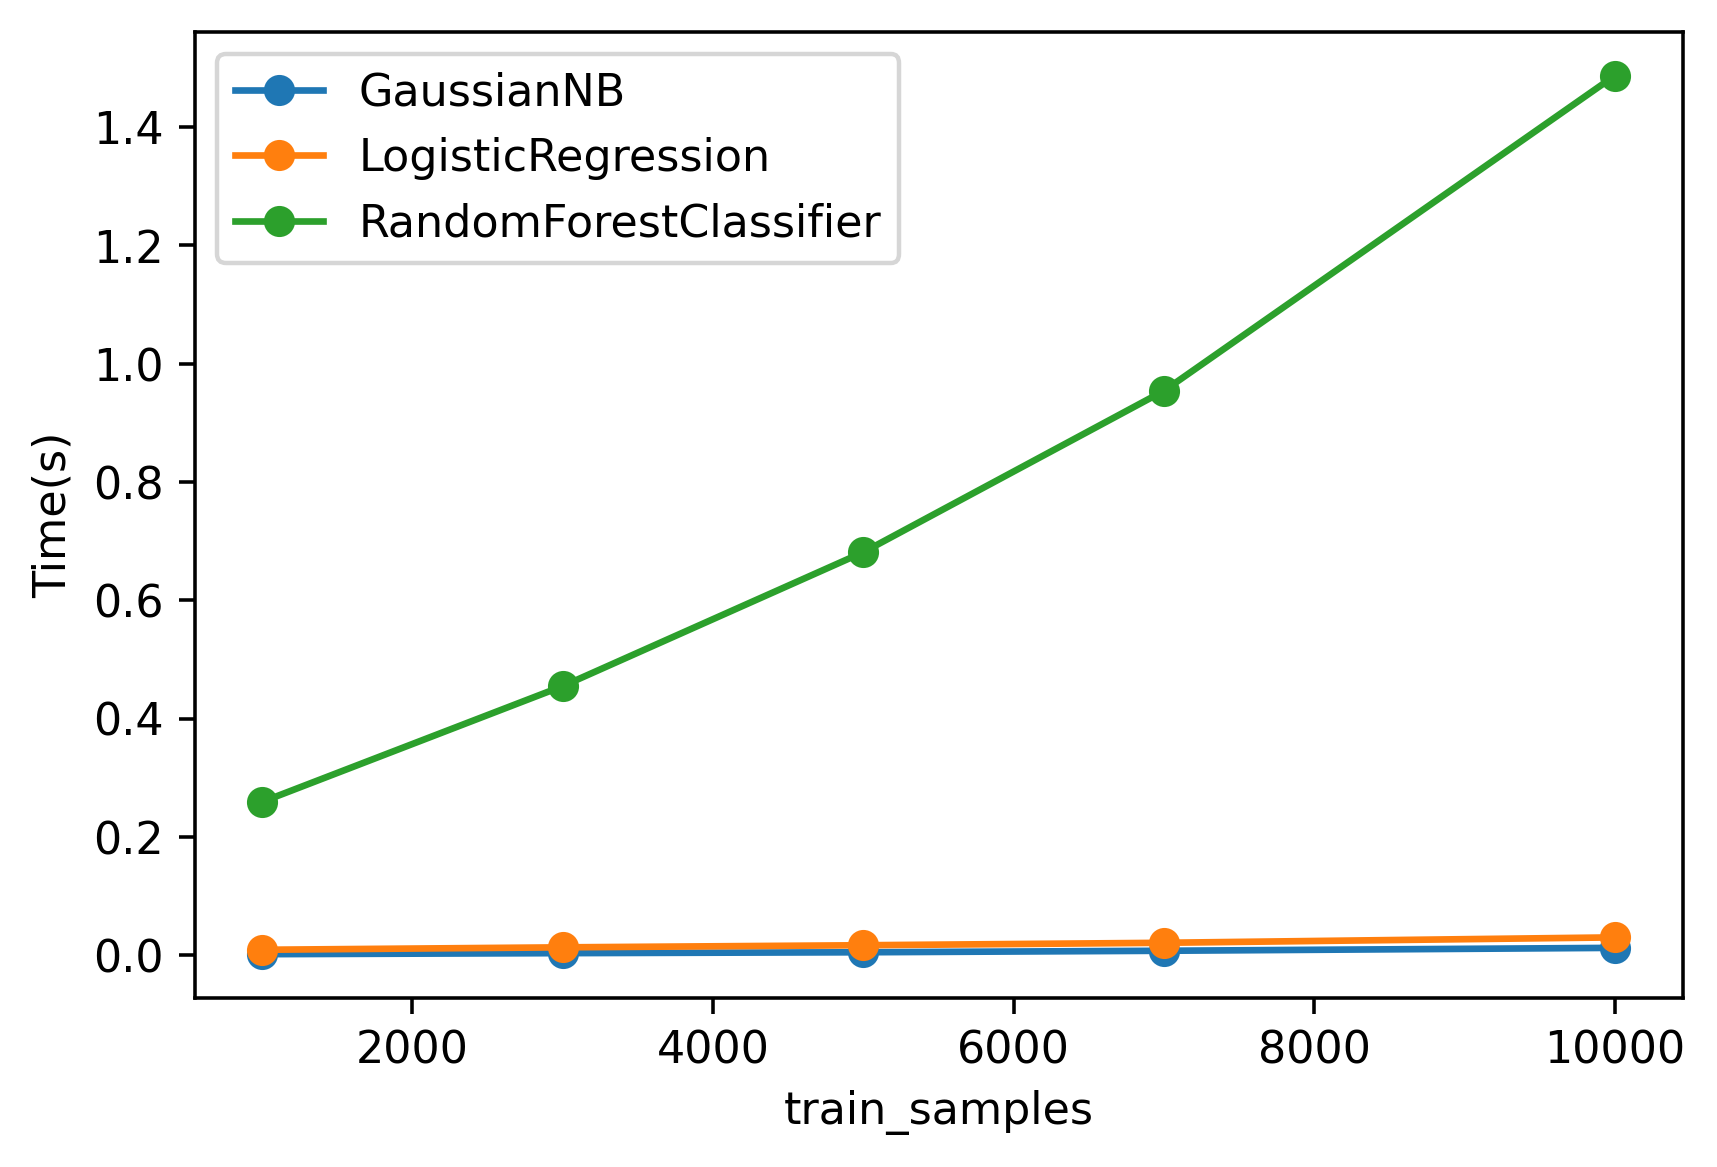

In [50]:
plt.figure(dpi=320)
temp = res.groupby(['model', 'train_samples'], as_index=False)['mean_fit_time'].mean()
temp.set_index('train_samples').groupby('model')['mean_fit_time'].plot(marker='o', legend=True)
plt.ylabel('Time(s)')
plt.savefig('./extra_1.png')
plt.show()

### Perfomance Metric of Algorithms depending on number of train samples

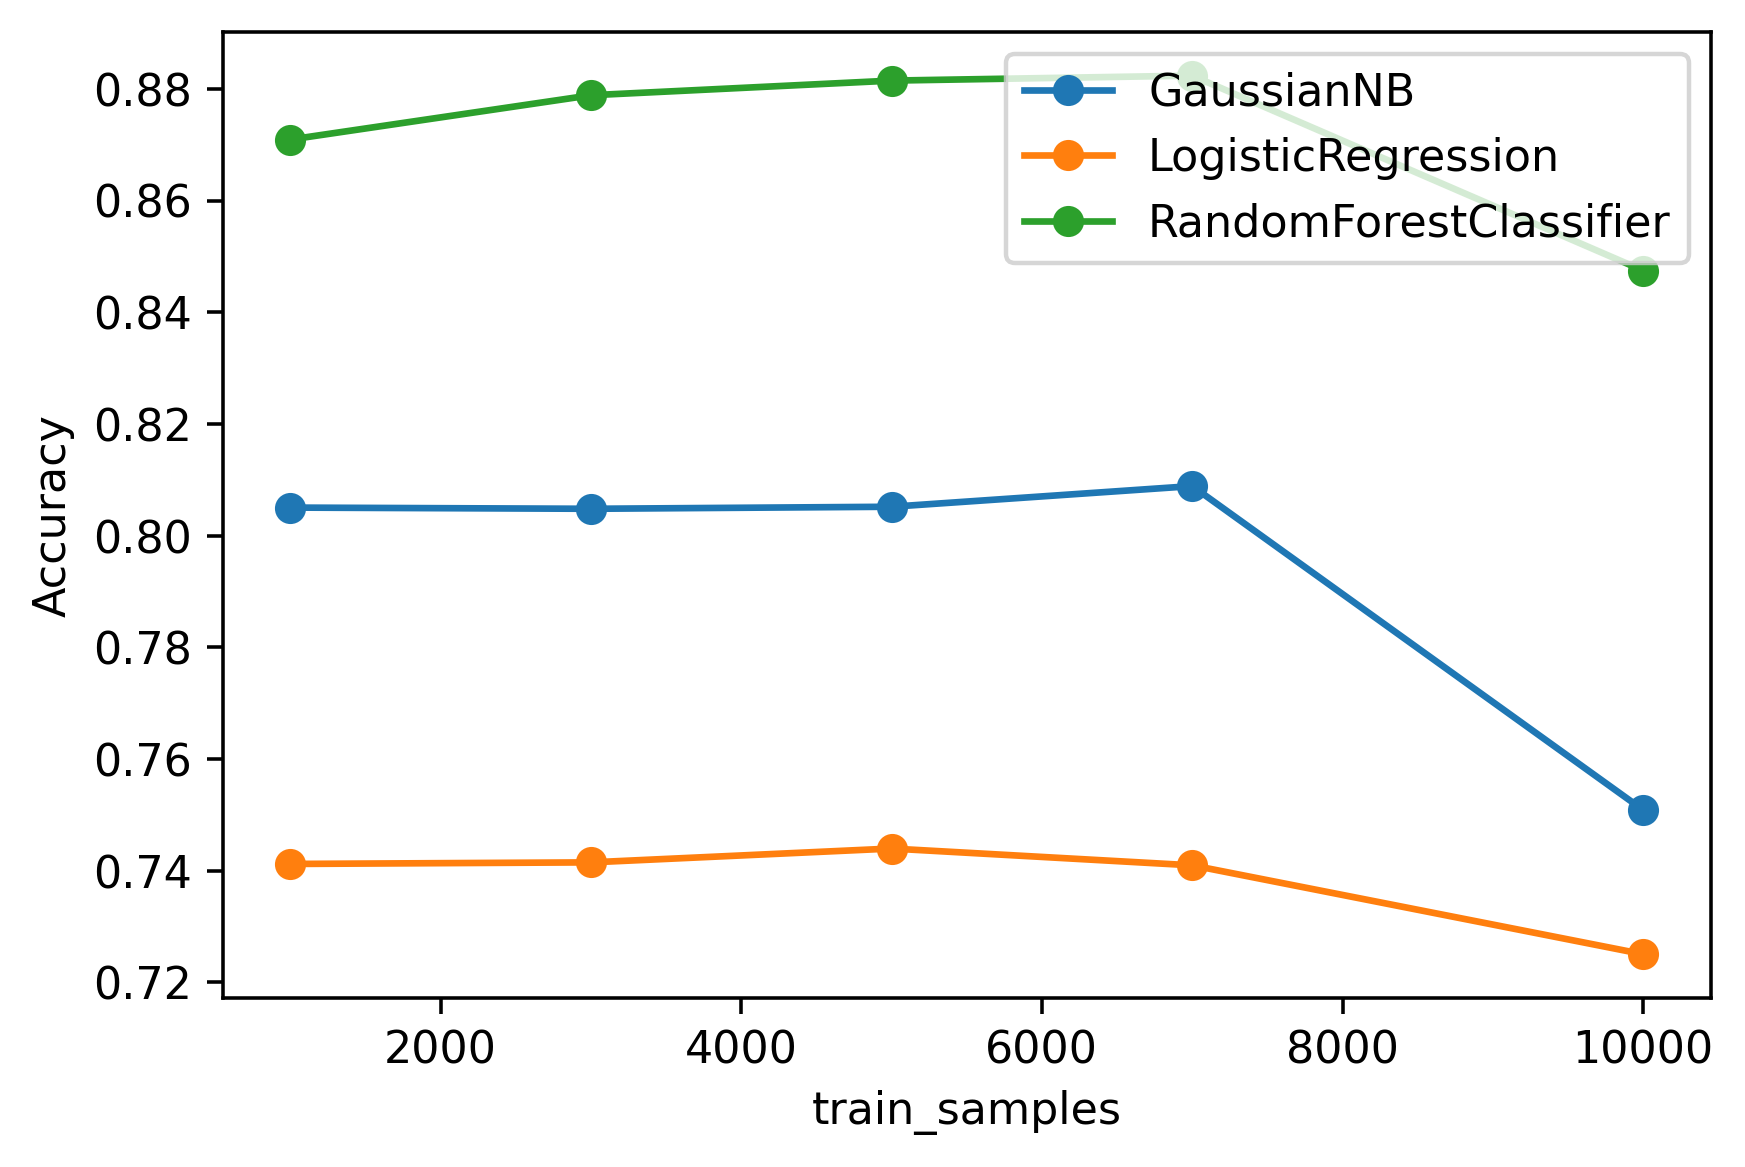

accuracy  f1_score  precision    recall  \
model                  train_samples                                            
GaussianNB             1000           0.805042  0.616540   0.696265  0.703795   
                       3000           0.804827  0.669710   0.609535  0.763504   
                       5000           0.805192  0.693386   0.681812  0.787506   
                       7000           0.808895  0.717713   0.664822  0.805549   
                       10000          0.750895  0.638244   0.580833  0.739473   
LogisticRegression     1000           0.741225  0.196608   0.162009  0.250000   
                       3000           0.741508  0.196545   0.161923  0.250000   
                       5000           0.743987  0.196623   0.162029  0.250000   
                       7000           0.740978  0.196911   0.162421  0.250000   
                       10000          0.725067  0.262244   0.216149  0.333333   
RandomForestClassifier 1000           0.870952  0.723988   0.806103  0.687897   
                       3000           0.878884  0.737086   0.816272  0.700259   
                       5000           0.881506  0.744323   0.823076  0.704793   
                       7000           0.882395  0.744635   0.825734  0.703281   
                       10000          0.847490  0.672312   0.771771  0.619143   

                                           AUC  
model                  train_samples            
GaussianNB             1000           0.823712  
                       3000           0.828847  
                       5000           0.831356  
                       7000           0.837466  
                       10000          0.784692  
LogisticRegression     1000           0.829393  
                       3000           0.828379  
                       5000           0.825610  
                       7000           0.823733  
                       10000          0.776738  
RandomForestClassifier 1000           0.888106  
                       3000           0.896469  
                       5000           0.899351  
                       7000           0.900796  
                       10000          0.869624

In [51]:
plt.figure(dpi=320)
temp = res.groupby(['model', 'train_samples'], as_index=False)['accuracy'].mean()
temp.set_index('train_samples').groupby('model')['accuracy'].plot(marker='o', legend=True)
plt.ylabel('Accuracy')
plt.savefig('./extra_2.png')
plt.show()

res.groupby(['model', 'train_samples'])[['accuracy', 'f1_score', 'precision', 'recall', 'AUC']].mean()